In [1]:
import torch
from matplotlib import pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact

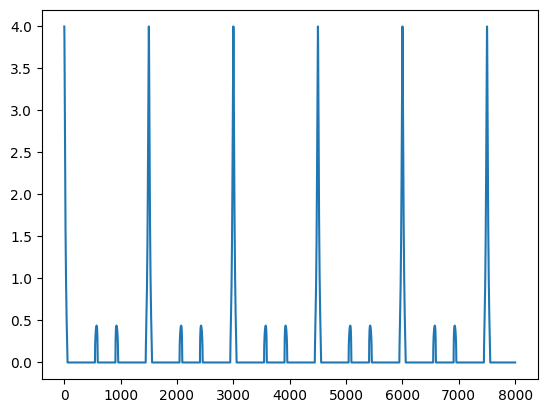

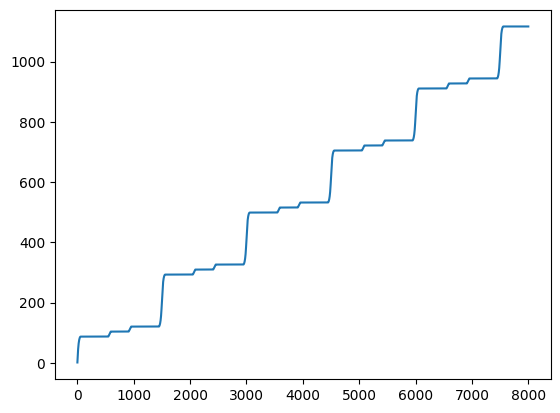

In [2]:
def response_curve(x, f0, alpha):
    return 1 / torch.sqrt(1+alpha**2-2*alpha*torch.cos(x*2*torch.pi/f0))

# plt.plot(torch.linspace(0,20,400), response_curve(torch.linspace(0,20,400), 5, 0.8))

def response_curve_trunc(x, f0, alpha):
    return torch.clamp(response_curve(x, f0, alpha)-1, min=0)

# plt.plot(torch.linspace(0,20,400), response_curve_trunc(torch.linspace(0,20,400), 5, 0.8))


resolution = 0.25
domain = torch.arange(0, 8000, resolution)
alpha = 0.8

def overlap_func(x, f0_0, f0_1, alpha_0, alpha_1=None):
    y_0 = response_curve_trunc(x, f0_0, alpha_0)
    y_1 = response_curve_trunc(x, f0_1, alpha_1 if alpha_1 is not None else alpha_0)
    return torch.sqrt(y_0 * y_1)

overlap = overlap_func(domain, 500, 300, alpha)
integral = torch.cumsum(overlap*resolution, 0)
# overlap = response_curve_trunc(domain, 100, alpha)
plt.plot(domain, overlap); plt.show()
plt.plot(domain, integral); plt.show()

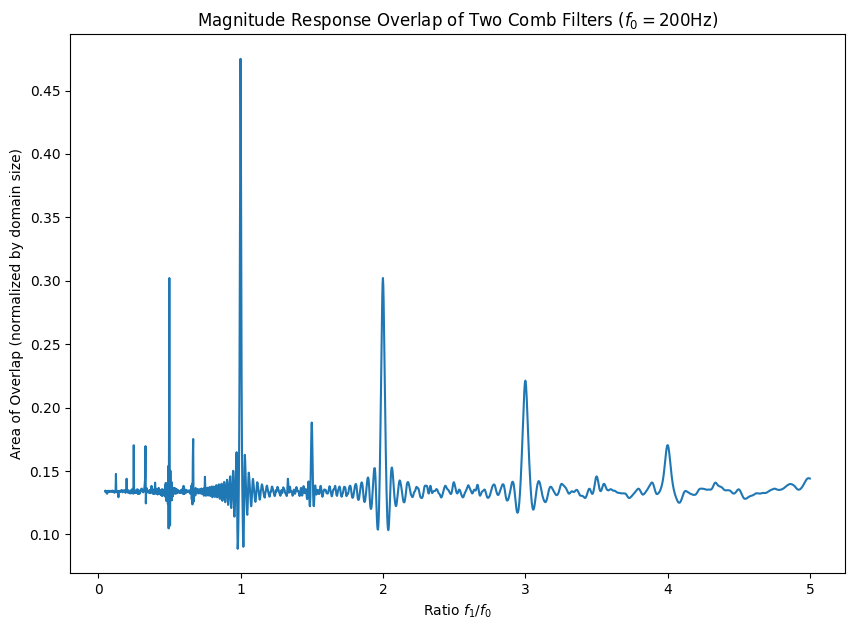

In [3]:
f0_0 = 200
# f0_1 = torch.tensor([100, 200, 300, 400])[:, None]
f0_1 = torch.arange(10, 1000, 0.5)[:, None]
# f0_1 = torch.logspace(1, 3, 1000, base=10.)[:, None]
# f0_1 = torch.arange(0.01, )
overlaps = overlap_func(domain, f0_0, f0_1, alpha)
integrals = (overlaps*resolution).sum(1) / domain[-1]-domain[0] # normalize by domain measure
plt.plot(f0_1/f0_0, integrals);
plt.xlabel(r'Ratio $f_1/f_0$')
plt.ylabel('Area of Overlap (normalized by domain size)')
plt.title(f'Magnitude Response Overlap of Two Comb Filters ($f_0={f0_0}$Hz)')
plt.gcf().set_size_inches(10, 7)
plt.show()

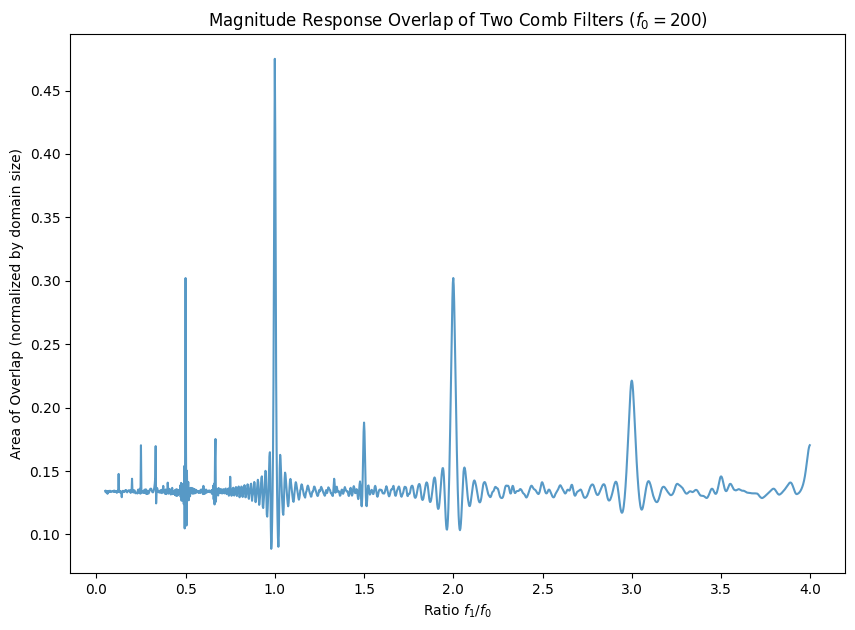

In [4]:
f0_0 = 200
# f0_1 = torch.tensor([100, 200, 300, 400])[:, None]
f0_1 = torch.arange(10, 800, 0.5)[:, None]
# f0_1 = torch.arange(0.01, )
s = f0_1.shape[0]
overlaps = overlap_func(domain, f0_0, f0_1, alpha)
integrals = (overlaps*resolution).sum(1) / domain[-1]-domain[0] # normalize by domain measure
plt.plot(f0_1/f0_0, integrals, alpha=0.75);
# plt.plot(f0_1/f0_0, torch.sinc(torch.arange(0, s, 1)/10-100))
plt.xlabel(r'Ratio $f_1/f_0$')
plt.ylabel('Area of Overlap (normalized by domain size)')
plt.title(f'Magnitude Response Overlap of Two Comb Filters ($f_0={f0_0}$)')
plt.gcf().set_size_inches(10, 7)
plt.show()

In [5]:
# f0_0 = 200
f0_0 = torch.arange(10, 1000, 1)[:, None, None]
# f0_1 = torch.tensor([100, 200, 300, 400])[:, None]
f0_1 = torch.arange(10, 1000, 1)[None, :, None]
overlaps = overlap_func(domain, f0_0, f0_1, alpha) # f0_0 x f0_1 x t
integrals = (overlaps*resolution).sum(-1) / domain[-1]-domain[0] # normalize by domain measure
f_ratios = f0_1/f0_0

Line2D(overlap)


NameError: name 'Slider' is not defined

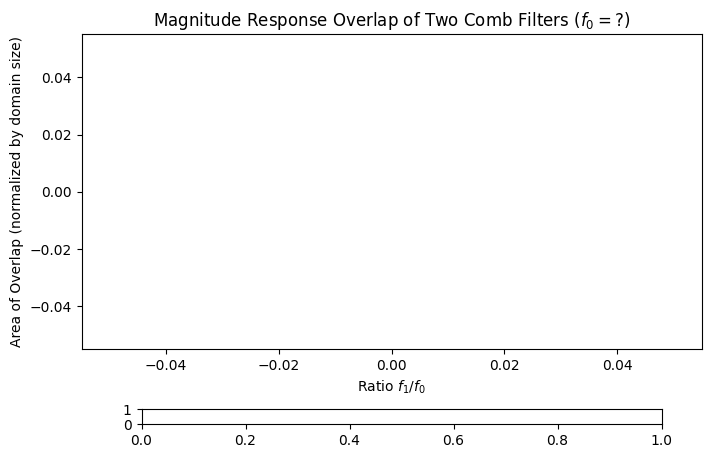

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
line = ax.plot([], [], label='overlap')[0]
print(line)
ax.set_xlabel(r'Ratio $f_1/f_0$')
ax.set_ylabel('Area of Overlap (normalized by domain size)')
ax.set_title(f'Magnitude Response Overlap of Two Comb Filters ($f_0=?$)')
plt.subplots_adjust(bottom=0.25)  # Leave space for the slider

ax_slider = plt.axes([0.2, 0.1, 0.65, 0.03])  # [left, bottom, width, height]
slider = Slider(ax_slider, "$f_0$", valmin=f0_0[0].item(), valmax=f0_0[-1].item(), valinit=200, valstep=1)

def plot_slice(idx):
    idx -= f0_0[0].squeeze()
    line.set_ydata(integrals[idx])
    line.set_xdata(f_ratios[idx])
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()
    # idx -= 1
    # plt.plot(f_ratios[idx], integrals[idx])
    # ax.set_title(f'Magnitude Response Overlap of Two Comb Filters ($f_0={f0_0[idx].item()}$)')
# plot_slice(200)

# slider = widgets.IntSlider(
#     min=f0_0[0].item(),
#     max=f0_0[-1].item(),
#     step=1,
#     value=200,
#     description='$f_0$ value',
#     continuous_update=True
# )

slider.on_changed(plot_slice)

plot_slice(200)

plt.show()


# widgets.interactive(plot_slice, idx=slider)
# display(slider)

In [27]:
resolution = 0.1
domain = torch.arange(0, 2000, resolution)

f0_0 = torch.arange(10, 1000, 1)[:, None, None]
f_ratios = torch.arange(0.1, 2, 0.001)
f0_1 = f0_0 * f_ratios[None, :, None]
overlaps = overlap_func(domain, f0_0, f0_1, alpha) # f0_0 x f0_1 x t
integrals = (overlaps*resolution).sum(-1) / domain[-1]-domain[0] # normalize by domain measure

Line2D(overlap)


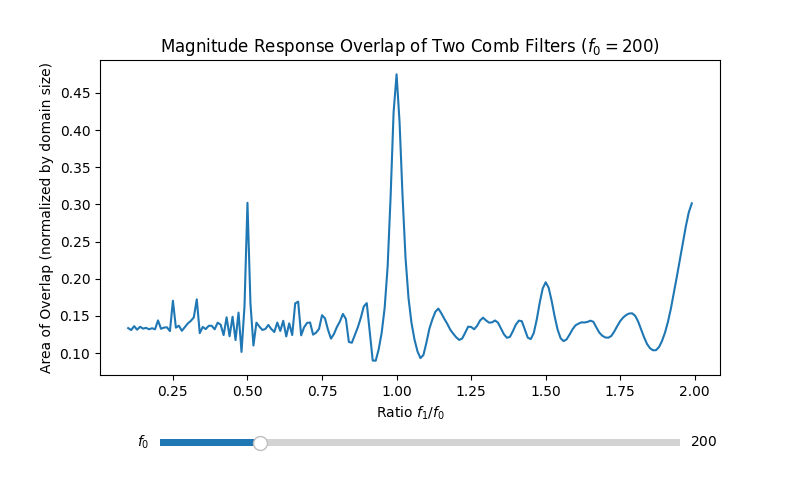

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
line = ax.plot(f_ratios, integrals[200-f0_0[0].item()], label='overlap')[0]
print(line)
ax.set_xlabel(r'Ratio $f_1/f_0$')
ax.set_ylabel('Area of Overlap (normalized by domain size)')
ax.set_title(f'Magnitude Response Overlap of Two Comb Filters ($f_0=200$)')
plt.subplots_adjust(bottom=0.25)  # Leave space for the slider
# line.set_xdata(f_ratios[idx])

ax_slider = plt.axes([0.2, 0.1, 0.65, 0.03])  # [left, bottom, width, height]
slider = Slider(ax_slider, "$f_0$", valmin=f0_0[0].item(), valmax=f0_0[-1].item(), valinit=200, valstep=1)

def plot_slice(idx):
    idx -= f0_0[0].squeeze()
    line.set_ydata(integrals[idx])
    # ax.relim()
    # ax.autoscale_view()
    fig.canvas.draw_idle()
    # idx -= 1
    # plt.plot(f_ratios[idx], integrals[idx])
    ax.set_title(f'Magnitude Response Overlap of Two Comb Filters ($f_0={f0_0[idx].item()}$)')
# plot_slice(200)

# slider = widgets.IntSlider(
#     min=f0_0[0].item(),
#     max=f0_0[-1].item(),
#     step=1,
#     value=200,
#     description='$f_0$ value',
#     continuous_update=True
# )

slider.on_changed(plot_slice)

plot_slice(200)

plt.show()


# widgets.interactive(plot_slice, idx=slider)
# display(slider)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Use the inline backend (works everywhere)
%matplotlib widget  

# Generate sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the figure and line object
fig, ax = plt.subplots()
line, = ax.plot(x, y, label="Sine wave")
ax.set_ylim(-1.5, 1.5)
ax.legend()

# Prevent Jupyter from displaying the initial static plot
plt.close(fig)  

# Create an output widget to dynamically update the plot
output = widgets.Output()

# Create the slider
slider = widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1, description="Freq")

# Update function
def update(change):
    with output:
        output.clear_output(wait=True)  # Clear previous output
        line.set_ydata(np.sin(change["new"] * x))  # Update y-data
        # fig.canvas.draw()  # Re-draw the figure
        fig.canvas.draw_idle()  # Re-draw the figure
        display(fig)  # Re-display the updated figure inside the output widget

# Attach observer to slider
slider.observe(update, names="value")

# Display widgets (now without duplicate plots)
display(slider, output)

# Manually trigger the first update to show the initial plot
update({"new": slider.value})


FloatSlider(value=1.0, description='Freq', max=2.0, min=0.1)

Output()

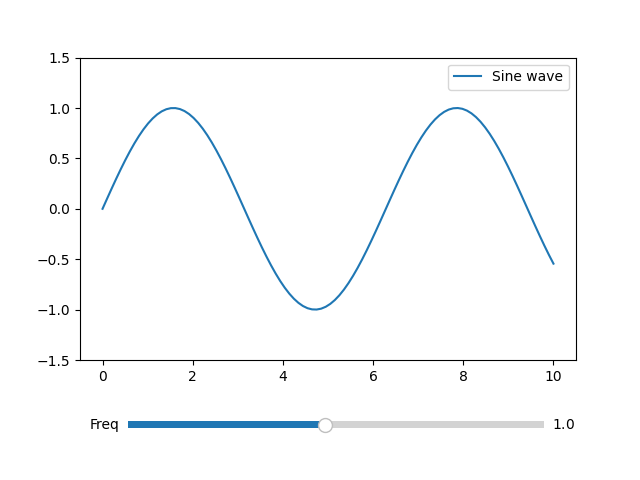

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Generate sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the figure and line object
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)  # Leave space for the slider
line, = ax.plot(x, y, label="Sine wave")
ax.set_ylim(-1.5, 1.5)
ax.legend()

# Add slider axes
ax_slider = plt.axes([0.2, 0.1, 0.65, 0.03])  # [left, bottom, width, height]
slider = Slider(ax_slider, "Freq", valmin=0.1, valmax=2, valinit=1, valstep=0.01)

# Update function
def update(val):
    line.set_ydata(np.sin(val * x))  # Update data
    fig.canvas.draw_idle()  # Redraw efficiently

# Attach the slider update function
slider.on_changed(update)

# Show the plot
plt.show()
